# Elecciones Federación de Estudiantes Universidad Mayor 2020-2021

## Introducción
Este cuaderno contiene código para obtener, procesar y visualizar datos de las elecciones realizadas por estudiantes de la Universidad Mayor para elegir a sus representantes.

Los datos se encuentran disponibles a través de la API pública de evoting.cl, plataforma de voto electrónico en la que se han realizado todas las elecciones federativas a la fecha.

## Código

In [190]:
import json
import requests
import pandas as pd
from datetime import datetime, timedelta

### API Evoting
La API de evoting contiene dos categorías relevantes para el análisis cuantitativo de las votaciones: ``snapshot``, con los datos de participación de cada carrera, y ``votesByHour``, con la cantidad de votos para cada hora dentro del rango de tiempo en el que fue posible votar.

In [258]:
def get_votes_by_program(election_code: str):
    r = requests.get('https://public-api.evoting.cl/api/election/' + election_code + '/snapshot').json()
    return r

def get_votes_by_hour(election_code: str):
    r = requests.get('https://public-api.evoting.cl/api/election/' + election_code + '/votesByHour').json()
    return r

Cada votación tiene un código asignado y quedarán almacenados bajo el nombre de la lista de Mesa Directiva que estuvo postulando en ese momento. Este código debe ser ingresado en la solicitud a evoting para obtener los datos correspondientes.

In [244]:
conectemos_2020_1 = 'u1iywcKL'
conectemos_2020_2 = 'dbh0p9bZ'
construyendo_2021 = 'xNUQ8wgx'

program_1 = get_votes_by_program(conectemos_2020_1)
hour_1 = get_votes_by_hour(conectemos_2020_1)
program_2 = get_votes_by_program(conectemos_2020_2)
hour_2 = get_votes_by_hour(conectemos_2020_2)
program_3 = get_votes_by_program(construyendo_2021)
hour_3 = get_votes_by_hour(construyendo_2021)

### Procesamiento de datos
Los documentos JSON devueltos por evoting se encuentran separados por distrito o por hora, dependiendo de si es una consulta a ``snapshot`` o a ``votesByHour`` respectivamente, y en el caso de la separación por distritos tenemos que cada distrito corresponde a una carrera de la Universidad Mayor que es impartida en Santiago, con una gran cantidad de columnas no utilizadas para cada distrito. Por lo mismo, solo almaceno en un dataframe aquellas columnas que sean relevantes.

Respecto al documento JSON devuelto por ``votesByHour``, las keys corresponden a [tiempos Unix](https://es.wikipedia.org/wiki/Tiempo_Unix), requiriendo una conversión a otro formato de fecha para ser útil.

In [245]:
def create_dataframe_program(input_json):
    districts = []
    for key in input_json['districts']:
        districts.append(str(key))
    df = pd.DataFrame(columns=districts)
    df = df.T
    for district in districts:
        df.loc[district, 'Carrera'] = input_json['districts'][district]['name']
        df.loc[district, 'Votó'] = input_json['districts'][district]['voters']['electronic_voted']
        df.loc[district, 'No votó'] = input_json['districts'][district]['voters']['ready']
    df.style.set_precision(0)
    return df

def create_dataframe_hour(input_json):
    df = pd.DataFrame()
    i = 0
    for hour in input_json['hourly']:
        datetime_hour =  datetime.fromtimestamp(int(hour)) + timedelta(hours=1)
        if (i == 0):
            day = 1
            current_date = datetime_hour.strftime(r'%Y-%m-%d')
        if (current_date != datetime_hour.strftime(r'%Y-%m-%d')):
            day += 1
            current_date = datetime_hour.strftime(r'%Y-%m-%d')
        df.loc[i, 'Día'] = 'Día ' + str(day)
        df.loc[i, 'Fecha'] = datetime_hour.strftime(r'%Y-%m-%d')
        df.loc[i, 'Hora'] =datetime_hour.strftime(r'%H:%M')
        df.loc[i, 'Votos'] = input_json['hourly'][hour]['electronic_voted']
        i = i + 1
    df.style.set_precision(0)
    return df

In [246]:
df_program_1 = create_dataframe_program(program_1)
df_hour_1 = create_dataframe_hour(hour_1)
df_program_2 = create_dataframe_program(program_2)
df_hour_2 = create_dataframe_hour(hour_2)
df_program_3 = create_dataframe_program(program_3)
df_hour_3 = create_dataframe_hour(hour_3)

In [221]:
pd.set_option('precision',0) # Configura cada columna numérica para aparecer como un entero

In [247]:
df_program_1

,Carrera,Votó,No votó
D01,Administración Pública,0,23
D02,Agronomía,112,491
D03,Animación Digital,80,171
D04,Arquitectura,151,289
D05,Bachillerato en Ciencias,1,4
D06,Bachillerato en Ciencias de la Salud,8,111
D07,Bachillerato en Humanidades,1,8
D08,Biotecnología,107,89
D09,Cine,82,107
D10,Conservatorio,13,197


In [249]:
df_program_2

,Carrera,Votó,No votó
D01,Administración Pública,0,23
D02,Agronomía,30,566
D03,Animación Digital,128,121
D04,Arquitectura,53,384
D05,Bachillerato en Ciencias,0,5
D06,Bachillerato en Ciencias de la Salud,2,114
D07,Bachillerato en Humanidades,1,8
D08,Biotecnología,44,150
D09,Cine,79,110
D10,Conservatorio,4,201


In [248]:
df_program_3.sort_values(by='Carrera')

,Carrera,Votó,No votó
D19,Agronomía,7,640
D07,Animación Digital,74,215
D20,Arquitectura,4,469
D21,Bachillerato en Ciencias,0,15
D22,Bachillerato en Ciencias de la Salud,0,70
D23,Bachillerato en Humanidades,0,9
D24,Biotecnología,21,200
D13,Cine,71,176
D25,Conservatorio,0,65
D26,Construcción Civil,0,190


In [250]:
df_hour_1

,Día,Fecha,Hora,Votos
0,Día 1,2020-06-08,10:00,107
1,Día 1,2020-06-08,11:00,238
2,Día 1,2020-06-08,12:00,309
3,Día 1,2020-06-08,13:00,378
4,Día 1,2020-06-08,14:00,285
5,Día 1,2020-06-08,15:00,188
6,Día 1,2020-06-08,16:00,213
7,Día 1,2020-06-08,17:00,195
8,Día 1,2020-06-08,18:00,158
9,Día 1,2020-06-08,19:00,140


In [251]:
df_hour_2

,Día,Fecha,Hora,Votos
0,Día 1,2020-08-13,10:00,117
1,Día 1,2020-08-13,11:00,120
2,Día 1,2020-08-13,12:00,184
3,Día 1,2020-08-13,13:00,286
4,Día 1,2020-08-13,14:00,225
5,Día 1,2020-08-13,15:00,235
6,Día 1,2020-08-13,16:00,224
7,Día 1,2020-08-13,17:00,202
8,Día 1,2020-08-13,18:00,157
9,Día 1,2020-08-13,19:00,161


In [252]:
df_hour_3

,Día,Fecha,Hora,Votos
0,Día 1,2021-07-19,09:00,21
1,Día 1,2021-07-19,10:00,66
2,Día 1,2021-07-19,11:00,100
3,Día 1,2021-07-19,12:00,105
4,Día 1,2021-07-19,13:00,97
5,Día 1,2021-07-19,14:00,128
6,Día 1,2021-07-19,15:00,73
7,Día 1,2021-07-19,16:00,81
8,Día 1,2021-07-19,17:00,61
9,Día 1,2021-07-19,18:00,59


## Visualización de los datos

In [238]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(15,7)})

### Total de participación para cada elección

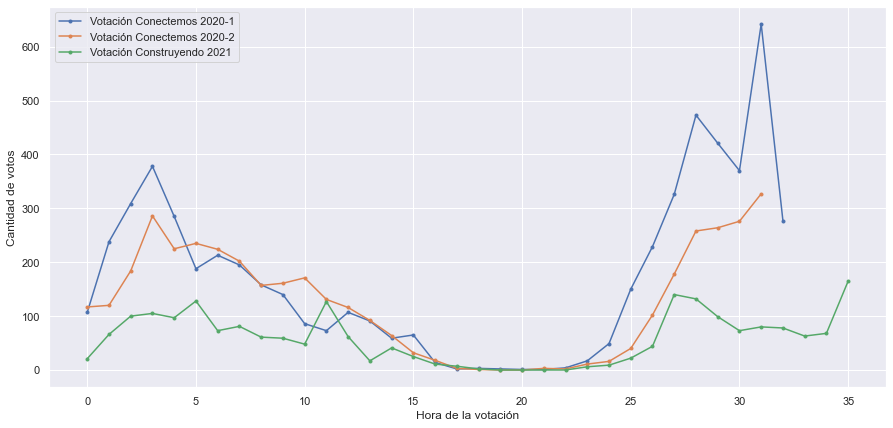

In [257]:
start, end = '0','35'
fig, ax = plt.subplots()
ax.plot(df_hour_1['Votos'], label='Votación Conectemos 2020-1', marker='.')
ax.plot(df_hour_2['Votos'], label='Votación Conectemos 2020-2', marker='.')
ax.plot(df_hour_3['Votos'], label='Votación Construyendo 2021', marker='.')
ax.set_xlabel('Hora de la votación')
ax.set_ylabel('Cantidad de votos')
ax.legend()

## Créditos
Melissa Silva S. - https://github.com/melipass